<font color="red">
    НЕ ДОДЕЛАНО
</font>

In [94]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [95]:
Q = np.array([3, 0.15, 0.5, 0.14, 0.2])
G = Q[0] / Q[1:]
print(G)

[20.          6.         21.42857143 15.        ]


In [96]:
beta = np.array([11.6, 1.4, 1.3, 1.9])
K = np.array([4.8, 4.8, 4.8, 1.45 * 1e-1]) * 1e7
p = np.ones(9)

In [97]:
t0 = 0
t_end = 100
t_step = 0.01
t_eval = np.arange(t0, t_end + t_step, t_step)

In [98]:
y0 = [1e4, 0, 0, 0, 0]

In [99]:
t_blood = []
y_blood = []

t_liver = [4.785e+001, 7.403e+001, 1.000e+002]
y_liver = [3.02557515625000e+007, 3.11080234375000e+007,5.25568656250000e+007]

t_lung = [2.77163799323991e+001, 4.77937466430118e+001, 7.40029405860555e+001, 9.99609368642068e+001]
y_lung = [1.79770817933235e+007, 2.45026082716190e+007, 3.47091082260453e+007, 4.36440682123732e+007]

t_kidney = [74.0614, 100]
y_kidney = [2.29778879695037e+007, 2.47597319671937e+007]

t_spleen = [9.37114673242910e+000, 1.71393341553637e+001, 2.49075215782984e+001, 2.67570900123305e+001, 4.61159062885327e+001]
y_spleen = [2.46338220080121e+007, 6.02783305334907e+007,8.14736403465229e+007, 8.41970984769505e+007, 9.72710734323651e+007]

t_organs = [t_blood, t_spleen, t_liver, t_lung, t_kidney]
y_organs = [y_blood, y_spleen, y_liver, y_lung, y_kidney]


In [100]:
def binary_search(arr, x):
    left = 0
    right = len(arr) - 1
    result = arr[0]  # по умолчанию ближайшее число - первый элемент массива

    while left <= right:
        mid = (left + right) // 2

        if arr[mid] == x:
            return arr[mid], mid
        elif arr[mid] < x:
            left = mid + 1
        else:
            right = mid - 1

        if abs(arr[mid] - x) < abs(result - x):
            result = arr[mid]

    return result, mid


In [101]:
def f(t, y, M, beta, K):
    return  M@y + np.concatenate([[0], beta * y[1:] * (1 - y[1:] / K)])

In [102]:
def Phi(p):

    M_b_i = p[:len(p) // 2] * G
    M_i_b = p[len(p) // 2:-1] / G
    M0 = p[-1]

    M = np.zeros((len(M_b_i) + 1, len(M_b_i) + 1))
    M[0, 1:] = M_i_b
    M[1:, 0] = M_b_i
    for i in range(1, len(M)):
        M[i, i] = -M_i_b[i - 1] 
    M[0, 0] = -np.sum(M_b_i) - M0

    # print(p)

    sol = solve_ivp(fun=f, t_span=[t0, t_end], y0=y0, method='RK45', t_eval=t_eval, args=[M, beta, K])    
    sum = 0

    for i in range(len(y_organs)):
        for y, t in zip(y_organs[i], t_organs[i]):
            _, index = binary_search(t_eval, t)
            # print(sol.t)
            sum += (np.log(sol.y[i][index]) - np.log(y))**2
    # print(sum)
    return sum

            
    

In [103]:
# M_b_i = p[:len(p) // 2]
# M_i_b = p[len(p) // 2:-1]
# M0 = p[-1]

# M = np.zeros((len(M_b_i) + 1, len(M_b_i) + 1))
# M[0, 1:] = M_i_b
# M[1:, 0] = M_b_i
# for i in range(1, len(M)):
#     M[i, i] = -M_i_b[i - 1] 
# M[0, 0] = -np.sum(M_b_i) - M0

# print(M)

# sol = solve_ivp(fun=f, t_span=[t0, t_end], y0=y0, method='RK45', t_eval=t_eval, args=[M, beta, K])    
# sum = 0

# for i in range(len(y_organs)):
#     for y, t in zip(y_organs[i], t_organs[i]):
#         _, index = binary_search(t_eval, t)
#         sum += (np.log(sol.y[i][index]) - np.log(y))**2

# print(sum)

In [106]:
# p = [1.49553350e-03, 7.48209168e-01, 1.56552933e+00, 3.49736628e+00, 3.71253961e+00, 1.10547570e+00, 2.41778169e+00, 2.26814065e-02, 1]
p = [5.58305698e-002, 2.98276823e+000, 1.28741004e+000, 3.92213320e+000, 4.08398955e+001, 8.03871751e+000, 5.02156344e+001, 1.79981418e+000, 0]
bounds = [(1e-160, None) for _ in p]
res = minimize(Phi, p, bounds=bounds)
print(res.x)

res = minimize(Phi, res.x, bounds=bounds)
print(res.x)


KeyboardInterrupt: 

In [ ]:
print(Phi(res.x))

4.516737391538186


[[-105.43266199    2.04199478    1.33978625    2.34339627    0.11998761]
 [   1.11664357   -2.04199478    0.            0.            0.        ]
 [  17.89661202    0.           -1.33978625    0.            0.        ]
 [  27.58739155    0.            0.           -2.34339627    0.        ]
 [  58.83201486    0.            0.            0.           -0.11998761]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


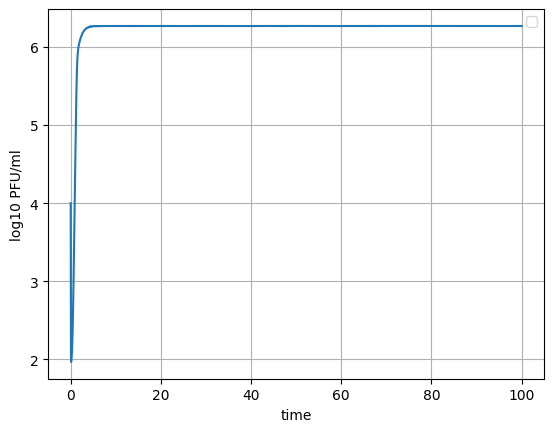

In [ ]:
M_b_i = res.x[:len(res.x) // 2] * G
M_i_b = res.x[len(res.x) // 2:-1] / G
M0 = res.x[-1]

M = np.zeros((len(M_b_i) + 1, len(M_b_i) + 1))
M[0, 1:] = M_i_b
M[1:, 0] = M_b_i
for i in range(1, len(M)):
    M[i, i] = -M_i_b[i - 1] 
M[0, 0] = -np.sum(M_b_i) - M0

print(M)

sol = solve_ivp(fun=f, t_span=[t0, t_end], y0=y0, method='RK45', t_eval=t_eval, args=[M, beta, K])

plt.plot(sol.t, np.log10(sol.y[0]))

plt.grid()
plt.title ('')
plt.xlabel('time')
plt.ylabel('log10 PFU/ml')
plt.legend()
plt.show()